In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import PowerTransformer

In [230]:
dataframe = pd.read_csv("Data_to_Transform.csv")
dataframe

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762
2,1.156830,2.966378,10.817934,9.006134
3,1.264131,3.000324,10.764570,9.000125
4,1.323914,3.012109,10.753117,8.981296
...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882
9996,14.854474,16.396252,-3.147526,-3.772332
9997,15.262103,17.102991,-3.517256,-4.717950
9998,15.269983,17.628467,-4.689833,-5.670496


In [231]:
mps = dataframe["Moderate Positive Skew"]
mns = dataframe["Moderate Negative Skew"]
hps = dataframe["Highly Positive Skew"]
hns = dataframe["Highly Negative Skew"]

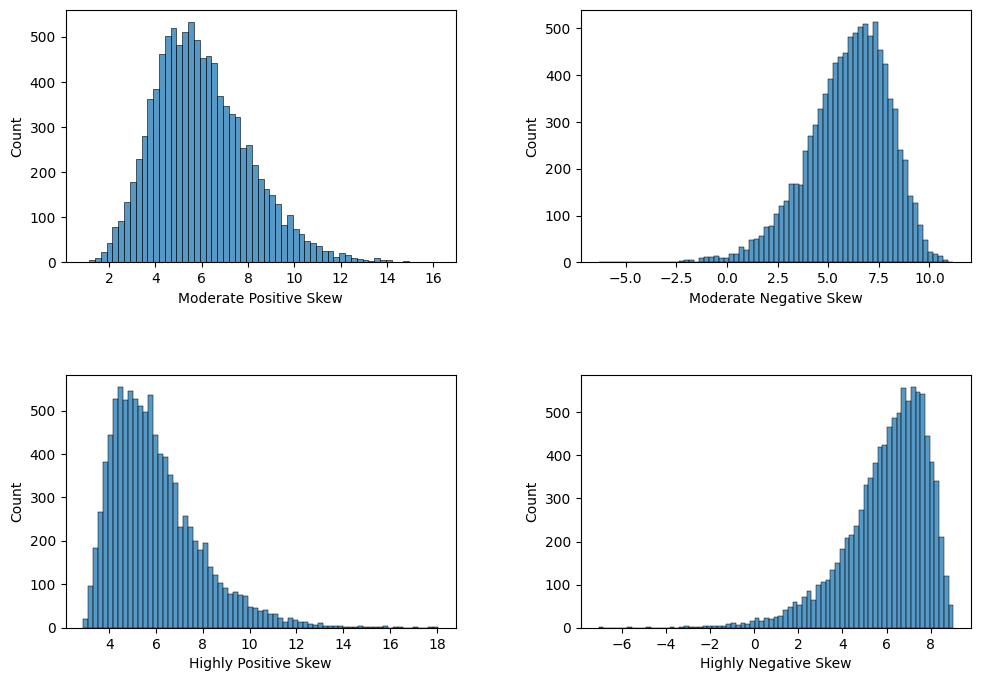

In [232]:
fig, axes = plt.subplots(2, 2, figsize=(11,8), dpi=100)
sns.histplot(mps, ax=axes[0, 0])
sns.histplot(mns, ax=axes[0, 1])
sns.histplot(hps, ax=axes[1, 0])
sns.histplot(hns, ax=axes[1, 1])
fig.tight_layout(pad=5.0)
plt.show()

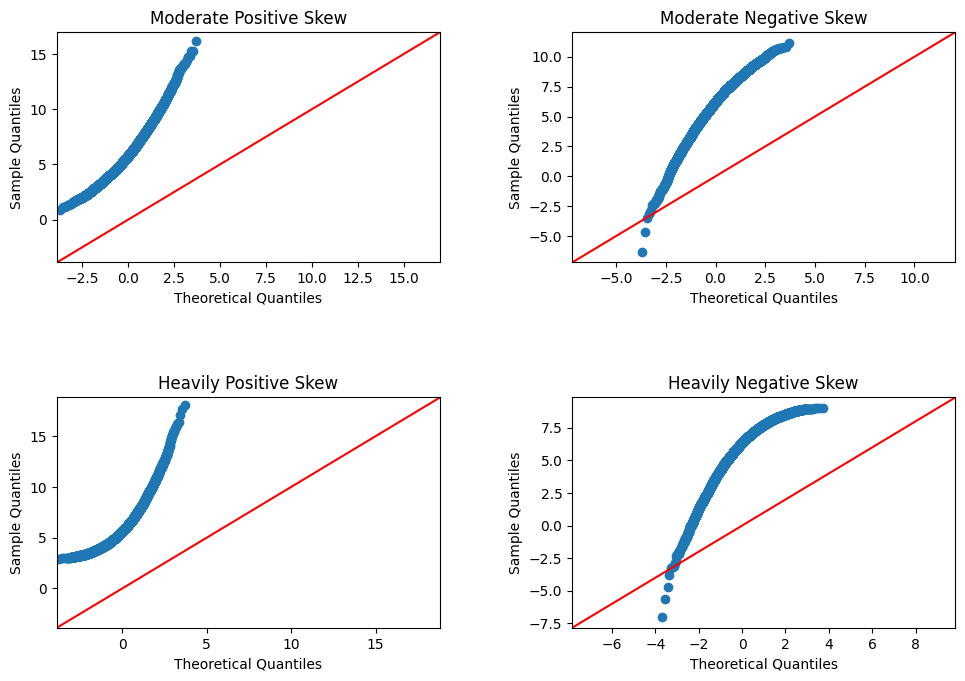

In [233]:
fig, axes = plt.subplots(2, 2, figsize=(11,8), dpi=100)
sm.qqplot(mps, line="45", ax=axes[0, 0])
sm.qqplot(mns, line="45", ax=axes[0, 1])
sm.qqplot(hps, line="45", ax=axes[1, 0])
sm.qqplot(hns, line="45", ax=axes[1, 1])
axes[0, 0].set(title="Moderate Positive Skew")
axes[0, 1].set(title="Moderate Negative Skew")
axes[1, 0].set(title="Heavily Positive Skew")
axes[1, 1].set(title="Heavily Negative Skew")
fig.tight_layout(pad=5.0)
plt.show()

# Logarithmic transformation

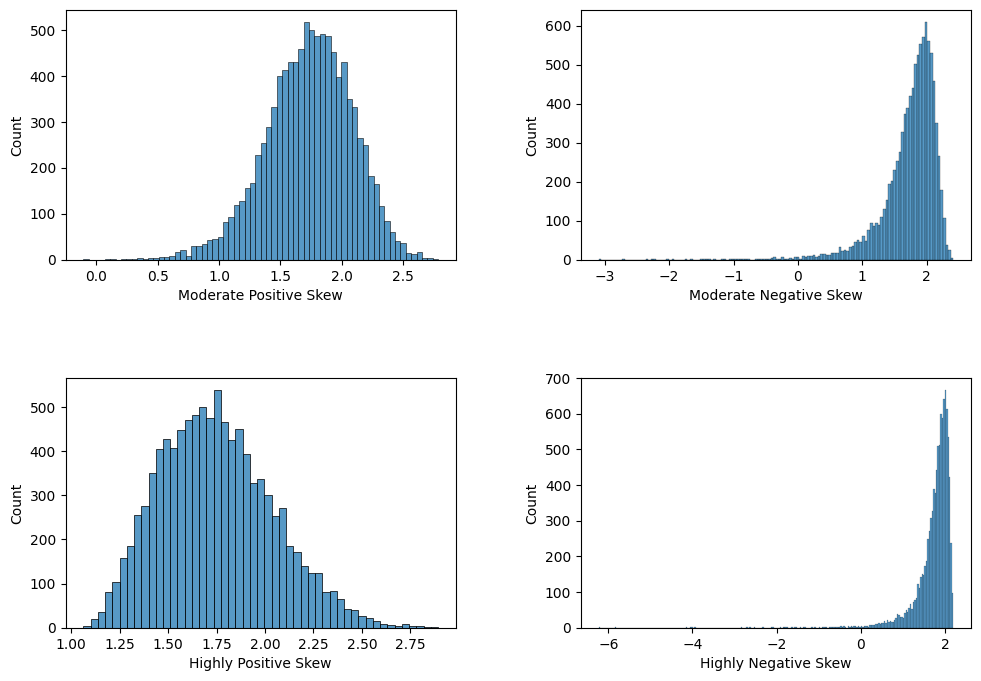

In [234]:
fig, axes = plt.subplots(2, 2, figsize=(11,8), dpi=100)
sns.histplot(np.log(mps), ax=axes[0, 0])
sns.histplot(np.log(mns[mns>=0]), ax=axes[0, 1])
sns.histplot(np.log(hps), ax=axes[1, 0])
sns.histplot(np.log(hns[hns>=0]), ax=axes[1, 1])
fig.tight_layout(pad=5.0)
plt.show()

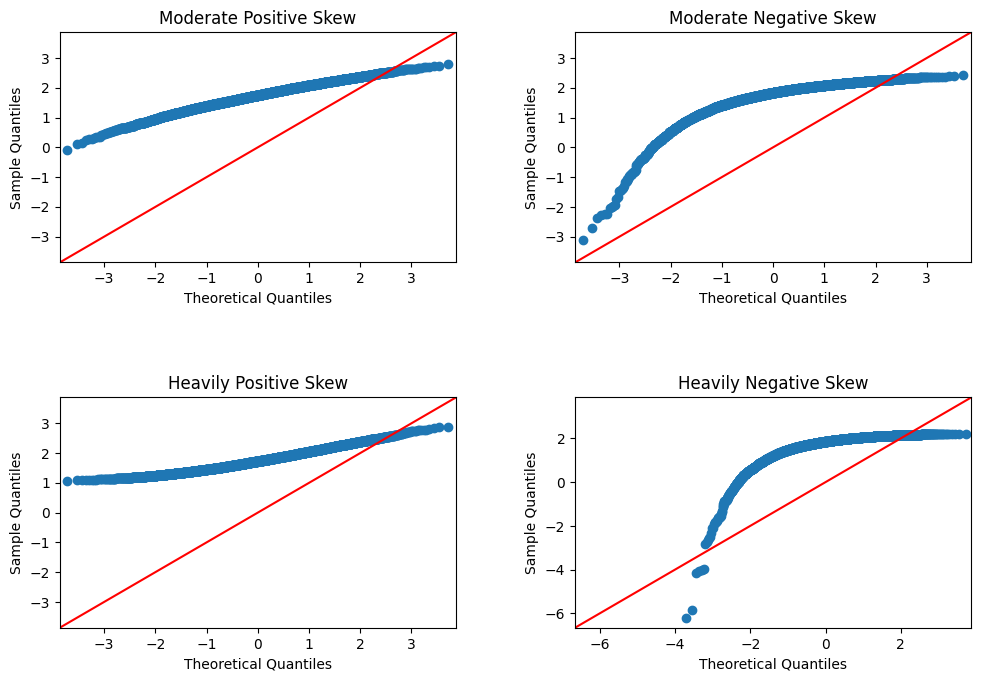

In [235]:
fig, axes = plt.subplots(2, 2, figsize=(11,8), dpi=100)
sm.qqplot(np.log(mps), line="45", ax=axes[0, 0])
sm.qqplot(np.log(mns[mns>=0]), line="45", ax=axes[0, 1])
sm.qqplot(np.log(hps), line="45", ax=axes[1, 0])
sm.qqplot(np.log(hns[hns>=0]), line="45", ax=axes[1, 1])
axes[0, 0].set(title="Moderate Positive Skew")
axes[0, 1].set(title="Moderate Negative Skew")
axes[1, 0].set(title="Heavily Positive Skew")
axes[1, 1].set(title="Heavily Negative Skew")
fig.tight_layout(pad=5.0)
plt.show()

# Cube Root transformation

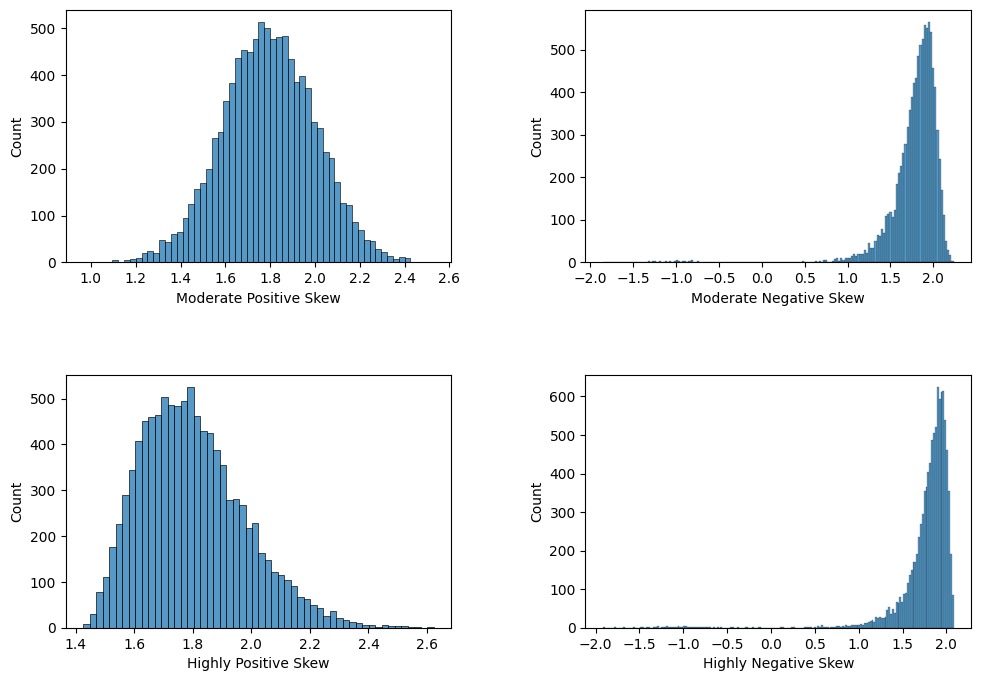

In [236]:
fig, axes = plt.subplots(2, 2, figsize=(11,8), dpi=100)
sns.histplot(np.cbrt(mps), ax=axes[0, 0])
sns.histplot(np.cbrt(mns), ax=axes[0, 1])
sns.histplot(np.cbrt(hps), ax=axes[1, 0])
sns.histplot(np.cbrt(hns), ax=axes[1, 1])
fig.tight_layout(pad=5.0)
plt.show()

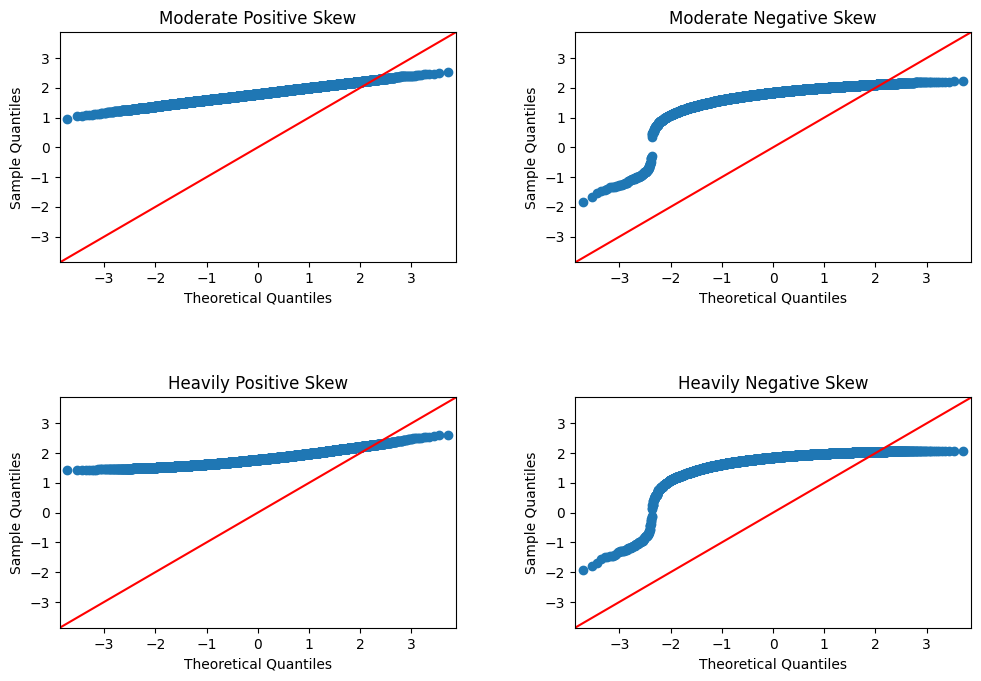

In [237]:
fig, axes = plt.subplots(2, 2, figsize=(11,8), dpi=100)
sm.qqplot(np.cbrt(mps), line="45", ax=axes[0, 0])
sm.qqplot(np.cbrt(mns), line="45", ax=axes[0, 1])
sm.qqplot(np.cbrt(hps), line="45", ax=axes[1, 0])
sm.qqplot(np.cbrt(hns), line="45", ax=axes[1, 1])
axes[0, 0].set(title="Moderate Positive Skew")
axes[0, 1].set(title="Moderate Negative Skew")
axes[1, 0].set(title="Heavily Positive Skew")
axes[1, 1].set(title="Heavily Negative Skew")
fig.tight_layout(pad=5.0)
plt.show()

# Box-Cox and Yeo-Johnson Transformation

In [238]:
pt = PowerTransformer(method='box-cox')
yj = PowerTransformer(method="yeo-johnson")

In [239]:
mps_bc = mps.values.reshape(-1, 1)
mns_yj = mns.values.reshape(-1, 1)
hps_bc = hps.values.reshape(-1, 1)
hns_yj = hns.values.reshape(-1, 1)

In [240]:
mps_BC = pt.fit_transform(mps_bc).ravel()
mns_YJ = yj.fit_transform(mns_yj).ravel()
hps_BC = pt.fit_transform(hps_bc).ravel()
hns_YJ = yj.fit_transform(hns_yj).ravel()

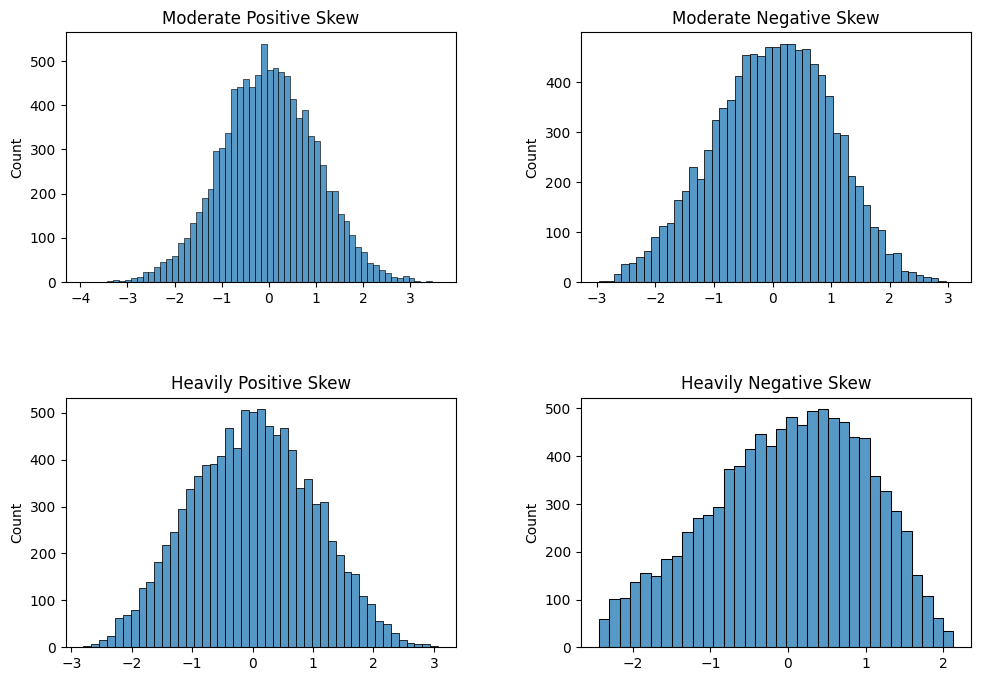

In [241]:
fig, axes = plt.subplots(2, 2, figsize=(11,8), dpi=100)
sns.histplot(mps_BC, ax=axes[0, 0], legend=False)
sns.histplot(mns_YJ, ax=axes[0, 1], legend=False)
sns.histplot(hps_BC, ax=axes[1, 0], legend=False)
sns.histplot(hns_YJ, ax=axes[1, 1], legend=False)
axes[0, 0].set(title="Moderate Positive Skew")
axes[0, 1].set(title="Moderate Negative Skew")
axes[1, 0].set(title="Heavily Positive Skew")
axes[1, 1].set(title="Heavily Negative Skew")
fig.tight_layout(pad=5.0)
plt.show()

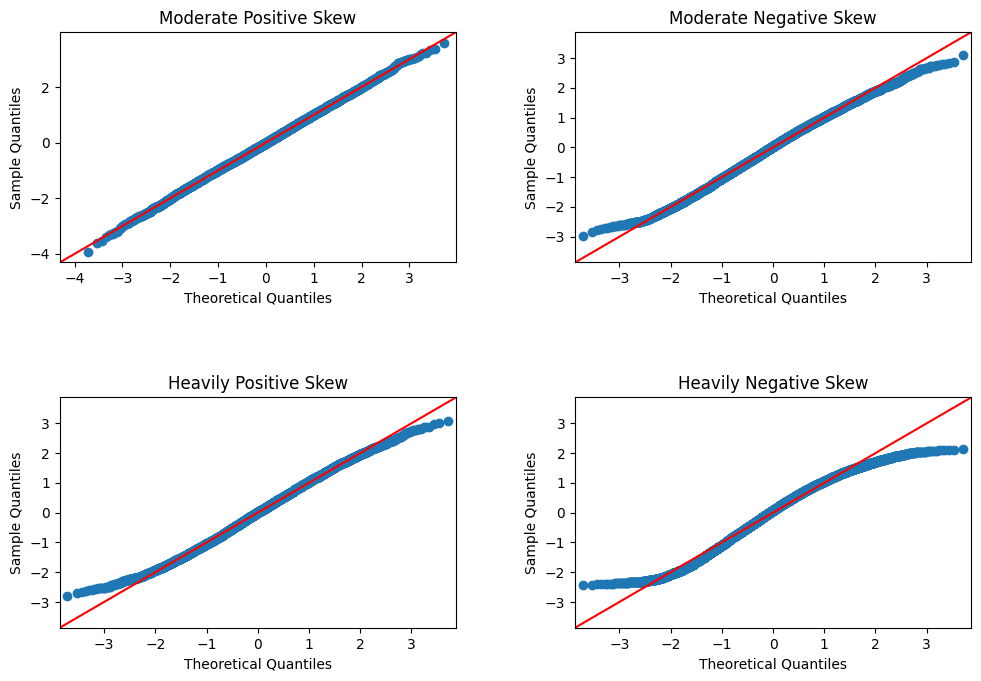

In [242]:
fig, axes = plt.subplots(2, 2, figsize=(11,8), dpi=100)
sm.qqplot(mps_BC, line="45", ax=axes[0, 0])
sm.qqplot(mns_YJ, line="45", ax=axes[0, 1])
sm.qqplot(hps_BC, line="45", ax=axes[1, 0])
sm.qqplot(hns_YJ, line="45", ax=axes[1, 1])
axes[0, 0].set(title="Moderate Positive Skew")
axes[0, 1].set(title="Moderate Negative Skew")
axes[1, 0].set(title="Heavily Positive Skew")
axes[1, 1].set(title="Heavily Negative Skew")
fig.tight_layout(pad=5.0)
plt.show()